## Handwritten Digits Recognition : Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Step 1: Get the data
digits_train=pd.read_csv("train.csv")
digits_test=pd.read_csv("test.csv")

In [3]:
# Step 2: Split the data 
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(digits_train.iloc[:,1:],digits_train.iloc[:,:1],train_size=.8,random_state=50)

In [4]:
## Step3: Build classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=50)
model.fit(X_train,Y_train)

/Users/dhananjaymehta/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
model.score(X_test,Y_test)

0.96702380952380951

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(n_estimators=50, max_depth=20, learning_rate=.02)
%time model2.fit(X_train, Y_train)

/Users/dhananjaymehta/anaconda/envs/py3k/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 3h 17min 6s, sys: 47.3 s, total: 3h 17min 54s
Wall time: 3h 18min 41s


GradientBoostingClassifier(init=None, learning_rate=0.02, loss='deviance',
              max_depth=20, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [7]:
%time model2.score(X_test,Y_test)

CPU times: user 1.05 s, sys: 21.7 ms, total: 1.07 s
Wall time: 1.07 s


0.89500000000000002

In [16]:
from sklearn.ensemble import BaggingClassifier
model3=BaggingClassifier(n_estimators=50)#, max_depth=50)#, learning_rate=.2)
model3.fit(X_train,Y_train)
#bagging = BaggingClassifier(LogisticRegression(),max_samples=0.5, max_features=0.5)

/Users/dhananjaymehta/anaconda/envs/py3k/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [19]:
model3.score(X_test,Y_test)

0.94940476190476186

In [6]:
predictions=model.predict(X_test)

In [7]:
expected=Y_test.as_matrix().flatten()
# Step 4: Check accuracy
accuracy=(predictions==expected)
print(accuracy.sum()/len(accuracy))

0.966785714286


In [ ]:
0.967857142857

In [40]:
# Step 5: Check for Test data
predictions_test=model.predict(digits_test)

In [41]:
ImageId=[int(i) for i in range(1,len(digits_test)+1)]
Submissions=pd.DataFrame({"ImageId":ImageId,"Label":predictions_test})
Submissions.to_csv("Submissions.csv")

In [50]:
# this step helps us identify which element has been causing problem - Precision vs Recall: 
# Precision - TP/TP+FP , Recall - TP/TP+FN 
from sklearn import metrics
print (metrics.classification_report(predictions,expected))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       852
          1       0.98      0.99      0.98       985
          2       0.97      0.95      0.96       858
          3       0.95      0.96      0.96       813
          4       0.97      0.96      0.97       816
          5       0.95      0.98      0.96       785
          6       0.98      0.98      0.98       838
          7       0.97      0.97      0.97       855
          8       0.97      0.96      0.96       782
          9       0.95      0.96      0.95       816

avg / total       0.97      0.97      0.97      8400



[[825   0   1   2   3   4   6   0   6   5]
 [  0 972   1   0   2   3   0   3   3   1]
 [  3   7 819  15   1   0   2   8   2   1]
 [  0   4   2 784   0   9   0   0   2  12]
 [  3   3   6   0 786   1   1   6   2   8]
 [  0   0   1   3   0 767   5   0   6   3]
 [  1   2   3   0   2   7 822   0   1   0]
 [  1   1   4  10   2   2   0 827   1   7]
 [  5   3   2   6   3  10   1   2 748   2]
 [  0   0   2   7  10   5   0   9   3 780]]


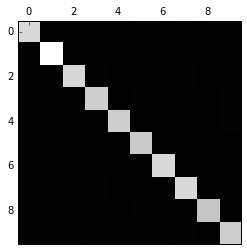

In [54]:
# confusion matrix
print(metrics.confusion_matrix(predictions,expected))
plt.matshow(metrics.confusion_matrix(predictions,expected),cmap="gray")